# Anchor的实现


* 导入相关的包

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

* 定义feature map 的size
* 在这里定义为16\*16
* 每个feature map上的点对应原图中8\*8的区域

In [96]:
size_X=16     #feature map size 16*16
size_Y=16
rpn_stride=8  #feature 一个点对应原图中的点的个数   原始图片大小 （16*8）*(16*8)

scales=[2,4,8]     #尺寸
ratios=[0.5,1,2]   #比例

* 展示meshgrid 用法

In [97]:
# meshgrid的用法 将坐标向量转换成坐标矩阵的函数
# f_x=np.arange(size_X)
# f_y=np.arange(size_Y)
# F_X,F_Y=np.meshgrid(f_x,f_y)
# print(F_X)
# print(F_Y)

* 产生anchor
* 输入feature map的 长，宽，采样数，anchor的尺寸和比例

In [117]:
def anchor_gen(size_X,size_Y,rpn_stride,scales,ratios):
    #锚框
    
    #生成尺寸的矩阵 
    scales,ratios=np.meshgrid(scales,ratios)
    
    # scales= [2 4 8 2 4 8 2 4 8]   ratios =[0.5 0.5 0.5  1.  1.  1.  2.  2.  2. ]
    scales,ratios=scales.flatten(),ratios.flatten()
    
    #通过 scales 和 ratios 算出对于边的缩放
    # scalesY/scalesX=ratio
    scalesY=scales*np.sqrt(ratios)
    scalesX=scales/np.sqrt(ratios)
    
    #np.arange(0,size_X) feature map上的坐标
    #np.arange(0,size_X)*rpn_stride 映射到原始图片上的坐标
    shiftX=np.arange(0,size_X)*rpn_stride
    shiftY=np.arange(0,size_Y)*rpn_stride
    
    #组合成网格
    shiftX,shiftY=np.meshgrid(shiftX,shiftY)
#     print(shiftX.shape) #(16, 16)
#     print(shiftY.shape) #(16, 16)
    
    
    centerX,anchorX=np.meshgrid(shiftX,scalesX)
#     print(centerX.shape)#(9, 256)
#     print(centerX[1])#(9, 256)  9行一样的 256: [0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120   0   8..]
#     print(anchorX.shape)#(9, 256)   [2.82 2.82.(256个).] [5.65 5.65 ]
#     print(anchorX[1])#(9, 256)
    
    centerY,anchorY=np.meshgrid(shiftY,scalesY)

    
    # 每一个anchor的中心点
    anchor_center=np.stack([centerY,centerX],axis=2).reshape(-1,2)
#     print(anchor_center.shape) #(2304, 2)  9*256=2304

    #每一个anchor的大小
    anchor_size=np.stack([anchorY,anchorX],axis=2).reshape(-1,2)
    print(anchor_size.shape)#(2304, 2)
    
    #boxes 左上顶点 以及 右下顶点
    boxes=np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size],axis=1)
    return boxes

In [118]:

anchors=anchor_gen(size_X,size_Y,rpn_stride,scales,ratios)
anchors.shape


(2304, 2)


(2304, 4)

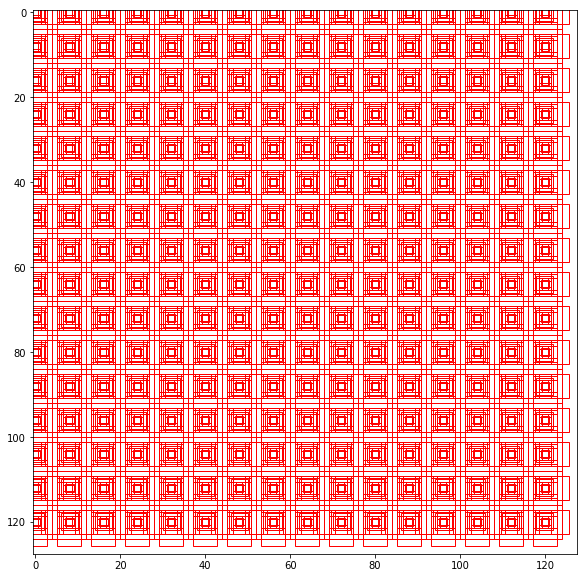

In [119]:
plt.figure(figsize=(10,10))
img=np.ones((128,128,3))

plt.imshow(img)

Axs=plt.gca()
for i in range(anchors.shape[0]):
    box=anchors[i]
    rec=patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor="r",facecolor="none")
    Axs.add_patch(rec)